# Global Budget Spending Analysis
----
<i> Project 1 Team 5 </i><br/> 
Brett Fuller, Diego Jones, Mav Sanchez

In [1]:
#Import necessary package dependencies
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import scipy.stats as stats
from pprint import pprint
from scipy.stats import linregress

#Import API Key
from config import api_key

#Define directories
source_data_dir = "source_data"
staging_data_dir = "staging_data"
target_data_dir = "target_data"
target_images_dir = "target_images"

In [2]:
budget_breakdown = "source_data/budget_breakdown.csv"
budgetbreakdown_df = pd.read_csv(budget_breakdown)
budgetbreakdown_df.head()


,Unnamed: 0,Expenditure on general public services,Expenditure on defense,Expenditure on public order & safety,Expenditure on economic affairs,Expenditure on environment protection,Expenditure on housing & community amenities,Expenditure on health,"Expenditure on recreation, culture, & religion",Expenditure on education,...,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91
0,Austria,6.4,0.6,1.3,5.7,0.4,0.3,8.2,1.2,4.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Estonia,4.0,2.4,1.9,4.2,0.6,0.3,5.2,2.0,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Finland,8.0,1.3,1.2,4.5,0.2,0.3,7.2,1.4,6.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
clean_budgetbreakdown = budgetbreakdown_df[['Unnamed: 0', 'Expenditure on general public services',
       'Expenditure on defense', 'Expenditure on public order & safety',
       'Expenditure on economic affairs',
       'Expenditure on environment protection',
       'Expenditure on housing & community amenities', 'Expenditure on health',
       'Expenditure on recreation, culture, & religion',
       'Expenditure on education', 'Expenditure on social protection']]
clean_budgetbreakdown = clean_budgetbreakdown.dropna()

clean_budgetbreakdown = clean_budgetbreakdown.rename(columns = {'Unnamed: 0': 'Country'})


In [21]:
country_rank = "source_data/top_73.csv"
country_ranking = pd.read_csv(country_rank, header=None
                             )
country_ranking.head()




country_ranking = country_ranking.rename(columns = {0: 'Country'})

combined_countrydf = clean_budgetbreakdown.merge(country_ranking, on='Country')
combined_countrydf.columns = ['Country',
               'Expenditure on general public services', 'Expenditure on defense',
                 'Expenditure on public order & safety', 'Expenditure on economic affairs',
                'Expenditure on environment protection', 'Expenditure on housing & community amenities',
                                'Expenditure on health', 'Expenditure on recreation, culture, & religion',
                             'Expenditure on education', 'Expenditure on social protection', 'Overall Ranking', 'Entrepreneurship Ranking', 'Adventure Ranking',  'Citizenship Ranking',  'Cultural Influence Ranking',
'Heritage Ranking', 'Movers Ranking', 'Open For Business Ranking', 'Power Ranking', 'Quality of Life Ranking']

#combined_countrydf.head()


In [5]:
population_breakdown = "source_data/Countries.csv"

populationbreakdown_df = pd.read_csv(population_breakdown)
populationbreakdown_df.columns


doublecombined_countrydf = combined_countrydf.merge(populationbreakdown_df, on='Country')
doublecombined_countrydf.dtypes

doublecombined_countrydf.head()




,Country,Expenditure on general public services,Expenditure on defense,Expenditure on public order & safety,Expenditure on economic affairs,Expenditure on environment protection,Expenditure on housing & community amenities,Expenditure on health,"Expenditure on recreation, culture, & religion",Expenditure on education,...,Movers Ranking,Open For Business Ranking,Power Ranking,Quality of Life Ranking,GDPPC,Literacy,InfantMortality,Agriculture,Population,NetMigration
0,Austria,6.4,0.6,1.3,5.7,0.4,0.3,8.2,1.2,4.9,...,59,15,27,11,43439,0.980,3.4,0.014,8611000,5.2
1,Estonia,4.0,2.4,1.9,4.2,0.6,0.3,5.2,2.0,5.7,...,73,26,72,45,17295,0.998,3.8,0.034,1312000,-3.2
2,Finland,8.0,1.3,1.2,4.5,0.2,0.3,7.2,1.4,6.1,...,32,9,35,9,41921,1.000,2.5,0.028,5482000,3.0
3,France,6.2,1.8,1.6,5.5,0.9,1.1,8.1,1.4,5.5,...,44,29,6,16,36248,0.990,3.3,0.017,66810000,1.1
4,Germany,5.7,0.9,1.6,3.3,0.6,0.4,7.2,1.0,4.1,...,41,17,4,10,41219,0.990,3.4,0.007,81410000,1.5


In [6]:
bins = [0, 9, 19, 29, 99]
labels = ["Tier 1", "Tier 2", "Tier 3", "Tier 4"]

pd.cut(doublecombined_countrydf["Overall Ranking"], bins, labels=labels).head() 

doublecombined_countrydf["Ranking Group"] = pd.cut(doublecombined_countrydf["Overall Ranking"], bins, labels=labels)
doublecombined_countrydf.head()

ranking_group = doublecombined_countrydf.groupby("Ranking Group")
adjusted_rankinggroup = ranking_group[['Expenditure on general public services',
                               'Expenditure on defense',
                 'Expenditure on public order & safety',
                      'Expenditure on economic affairs',
                'Expenditure on environment protection',
         'Expenditure on housing & community amenities',
                                'Expenditure on health',
       'Expenditure on recreation, culture, & religion',
                             'Expenditure on education',
                     'Expenditure on social protection', 'GDPPC', 'Population']].mean()
adjusted_rankinggroup = adjusted_rankinggroup.round(2)
adjusted_rankinggroup.head()


,Expenditure on general public services,Expenditure on defense,Expenditure on public order & safety,Expenditure on economic affairs,Expenditure on environment protection,Expenditure on housing & community amenities,Expenditure on health,"Expenditure on recreation, culture, & religion",Expenditure on education,Expenditure on social protection,GDPPC,Population
Ranking Group,,,,,,,,,,,,
Tier 1,5.06,1.43,1.61,3.76,0.71,0.44,6.80,0.83,5.10,14.79,51540.29,84088000.00
Tier 2,5.61,1.43,1.44,4.19,0.62,0.63,6.93,1.18,5.07,18.31,43858.00,23251777.78
Tier 3,7.93,1.88,1.88,3.73,0.68,0.72,4.15,0.85,4.27,11.97,36715.50,17872779.33
Tier 4,5.66,1.56,2.06,4.54,0.42,1.12,4.63,1.12,4.79,11.35,10528.31,35053750.00


In [7]:
adjusted_gps = adjusted_rankinggroup['Expenditure on general public services'] * adjusted_rankinggroup['GDPPC'] / 100
adjusted_defense = adjusted_rankinggroup['Expenditure on defense'] * adjusted_rankinggroup['GDPPC'] / 100
adjusted_pos = adjusted_rankinggroup['Expenditure on public order & safety'] * adjusted_rankinggroup['GDPPC'] / 100
adjusted_economy = adjusted_rankinggroup['Expenditure on economic affairs'] * adjusted_rankinggroup['GDPPC'] / 100
adjusted_enviroment = adjusted_rankinggroup['Expenditure on environment protection'] * adjusted_rankinggroup['GDPPC'] / 100
adjusted_housing = adjusted_rankinggroup['Expenditure on housing & community amenities'] * adjusted_rankinggroup['GDPPC'] / 100
adjusted_health = adjusted_rankinggroup['Expenditure on health'] * adjusted_rankinggroup['GDPPC'] / 100
adjusted_recreation = adjusted_rankinggroup['Expenditure on recreation, culture, & religion'] * adjusted_rankinggroup['GDPPC'] / 100 
adjusted_education = adjusted_rankinggroup['Expenditure on education'] * adjusted_rankinggroup['GDPPC'] / 100 
adjusted_socialprotection = adjusted_rankinggroup['Expenditure on social protection'] * adjusted_rankinggroup['GDPPC'] / 100

In [8]:
adjusted_rankinggroup['General Public Services'] = adjusted_gps
adjusted_rankinggroup['Defense'] = adjusted_defense
adjusted_rankinggroup['Public Order & Safety'] = adjusted_pos
adjusted_rankinggroup['Economic Affairs'] = adjusted_economy
adjusted_rankinggroup['Environment Protection'] = adjusted_enviroment
adjusted_rankinggroup['Housing & Community Amenities'] = adjusted_housing
adjusted_rankinggroup['Health'] = adjusted_health
adjusted_rankinggroup['Recreation, Culture, & Religion'] = adjusted_recreation
adjusted_rankinggroup['Education'] = adjusted_education
adjusted_rankinggroup['Social Protection'] = adjusted_socialprotection

adjusted_rankinggroup.head()


,Expenditure on general public services,Expenditure on defense,Expenditure on public order & safety,Expenditure on economic affairs,Expenditure on environment protection,Expenditure on housing & community amenities,Expenditure on health,"Expenditure on recreation, culture, & religion",Expenditure on education,Expenditure on social protection,...,General Public Services,Defense,Public Order & Safety,Economic Affairs,Environment Protection,Housing & Community Amenities,Health,"Recreation, Culture, & Religion",Education,Social Protection
Ranking Group,,,,,,,,,,,,,,,,,,,,,
Tier 1,5.06,1.43,1.61,3.76,0.71,0.44,6.80,0.83,5.10,14.79,...,2607.938674,737.026147,829.798669,1937.914904,365.936059,226.777276,3504.739720,427.784407,2628.554790,7622.808891
Tier 2,5.61,1.43,1.44,4.19,0.62,0.63,6.93,1.18,5.07,18.31,...,2460.433800,627.169400,631.555200,1837.650200,271.919600,276.305400,3039.359400,517.524400,2223.600600,8030.399800
Tier 3,7.93,1.88,1.88,3.73,0.68,0.72,4.15,0.85,4.27,11.97,...,2911.539150,690.251400,690.251400,1369.488150,249.665400,264.351600,1523.693250,312.081750,1567.751850,4394.845350
Tier 4,5.66,1.56,2.06,4.54,0.42,1.12,4.63,1.12,4.79,11.35,...,595.902346,164.241636,216.883186,477.985274,44.218902,117.917072,487.460753,117.917072,504.306049,1194.963185


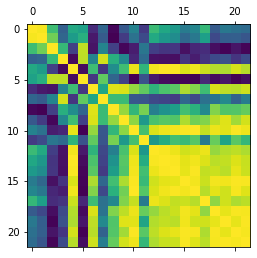

In [9]:
plt.matshow(adjusted_rankinggroup.corr())


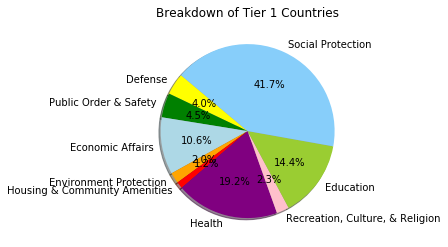

In [12]:
temp = adjusted_rankinggroup.iloc[0, 13:22]
values = list(temp)
keys = list(temp.keys())
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
plt.pie(values, labels=keys, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Breakdown of Tier 1 Countries")

plt.savefig('tier1.png')


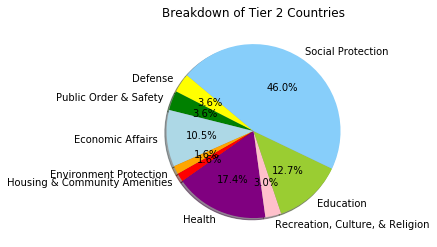

In [13]:
temp1 = adjusted_rankinggroup.iloc[1, 13:22]

values = list(temp1)

keys = list(temp1.keys())

colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]

plt.pie(values, labels=keys, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Breakdown of Tier 2 Countries")

plt.savefig('tier2.png')

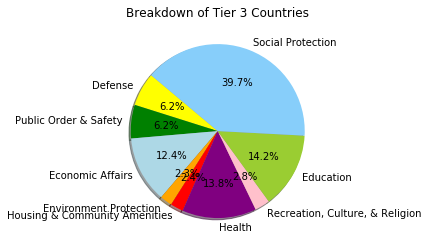

In [14]:
temp2 = adjusted_rankinggroup.iloc[2, 13:22]

values = list(temp2)

keys = list(temp2.keys())

colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]

plt.pie(values, labels=keys, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Breakdown of Tier 3 Countries")

plt.savefig('tier3.png')

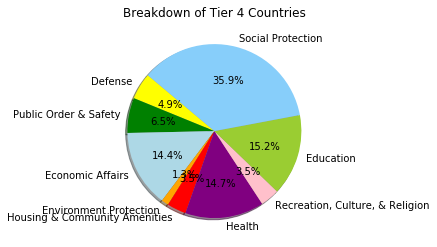

In [15]:
temp3 = adjusted_rankinggroup.iloc[3, 13:22]

values = list(temp3)

keys = list(temp3.keys())

colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]

plt.pie(values, labels=keys, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Breakdown of Tier 4 Countries")

plt.savefig('tier4.png')

The correlation between both factors is -0.73


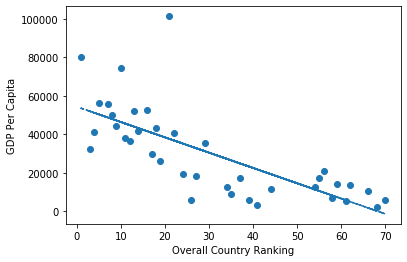

In [22]:
gdp = doublecombined_countrydf['GDPPC']
overall_ranking = doublecombined_countrydf['Overall Ranking'] 
plt.scatter(overall_ranking, gdp)
slope, b_int, r, p, std_err = stats.linregress(overall_ranking, gdp)

fit = slope * overall_ranking + b_int 

plt.plot(overall_ranking, fit,"--")

plt.ylabel('GDP Per Capita')
plt.xlabel('Overall Country Ranking')
plt.savefig('gdp.png')


correlation = stats.pearsonr(overall_ranking,gdp)
print(f"The correlation between both factors is {round(correlation[0],2)}") 

The correlation between both factors is -0.63


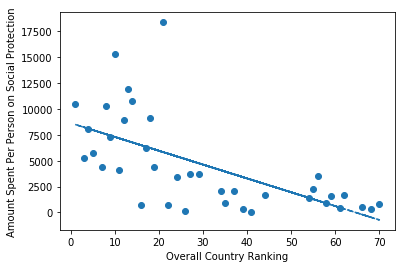

In [17]:
social_protectionbudget = doublecombined_countrydf['Expenditure on social protection'] / 100 * doublecombined_countrydf['GDPPC']

plt.scatter(overall_ranking, social_protectionbudget)

sp_slope, sp_int, sp_r, sp_p, sp_std_err = stats.linregress(overall_ranking, social_protectionbudget)

sp_fit = sp_slope * overall_ranking + sp_int 

plt.plot(overall_ranking, sp_fit,"--")
plt.ylabel('Amount Spent Per Person on Social Protection')
plt.xlabel('Overall Country Ranking')

correlation = stats.pearsonr(overall_ranking,social_protectionbudget)
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.savefig('Amount Spent Per Person on Social Protection.png')





